In [1]:
import matplotlib

In [2]:
import cv2
import numpy as np
import os

In [3]:
import matplotlib.pyplot as plt

In [19]:
os.makedirs('results', exist_ok=True)

image_filenames = [
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\download.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\images.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\img c.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\image a.gif",
    "C:\\Users\\manasa\\Desktop\\simpleObjects.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\img1.jpg",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\image2.gif",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\image3.gif"
]


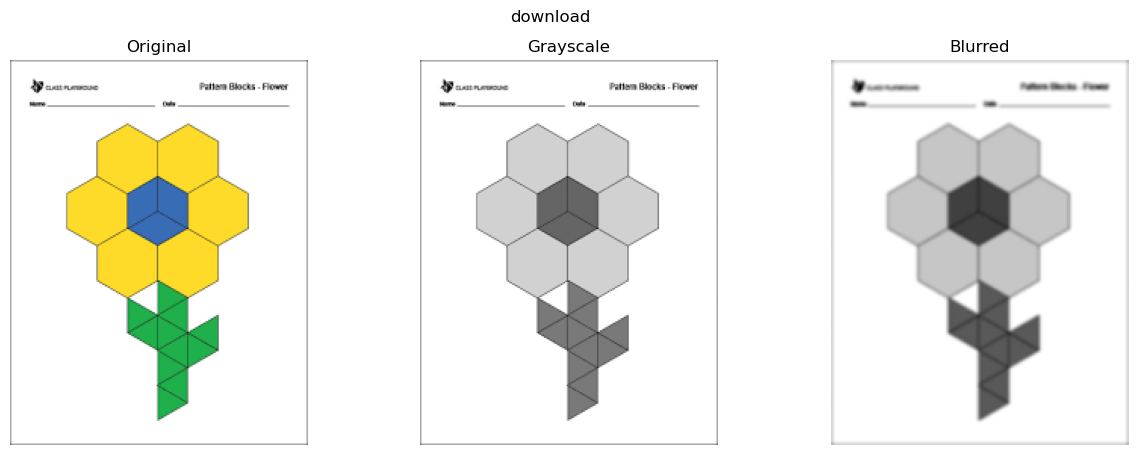

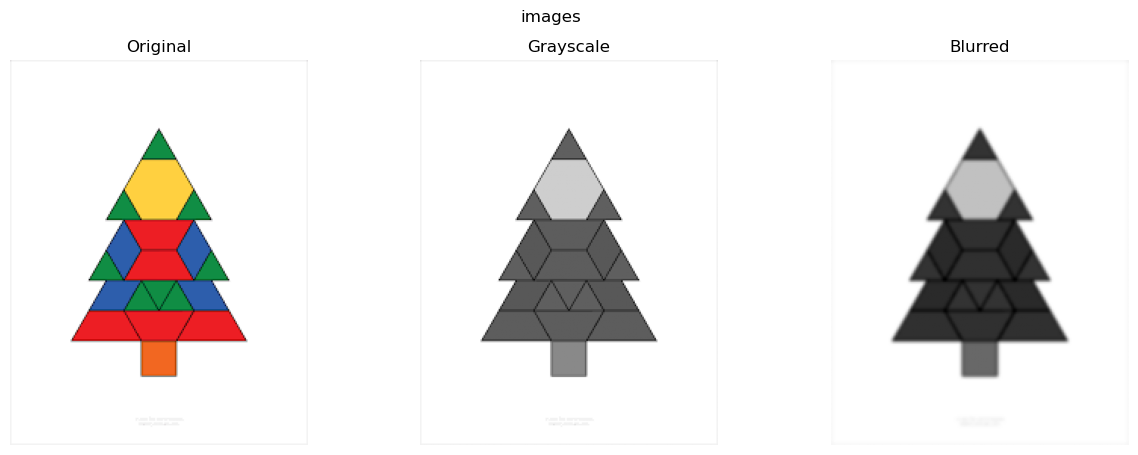

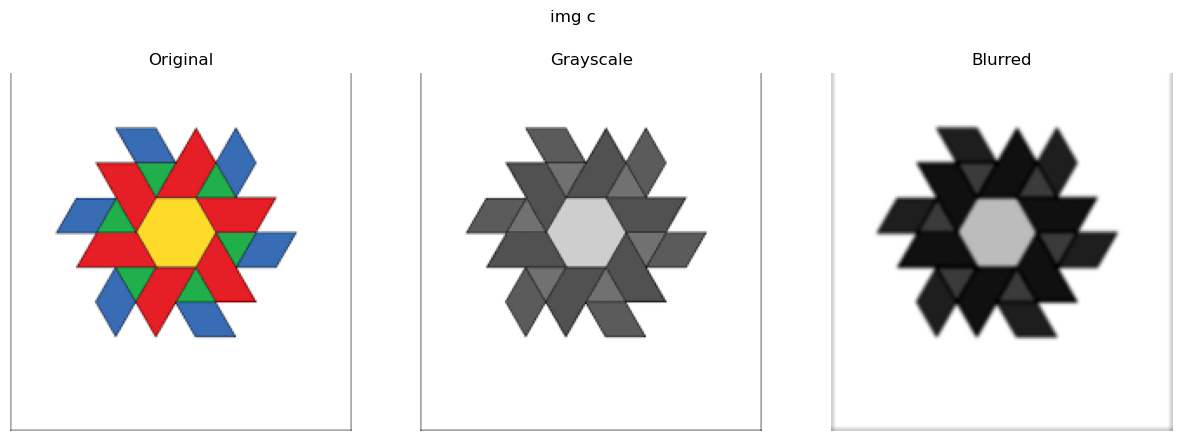

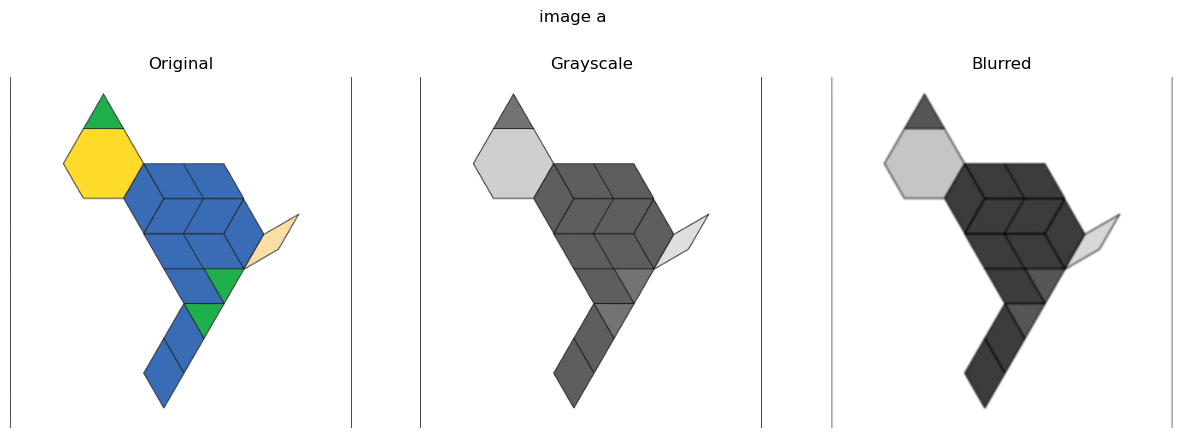

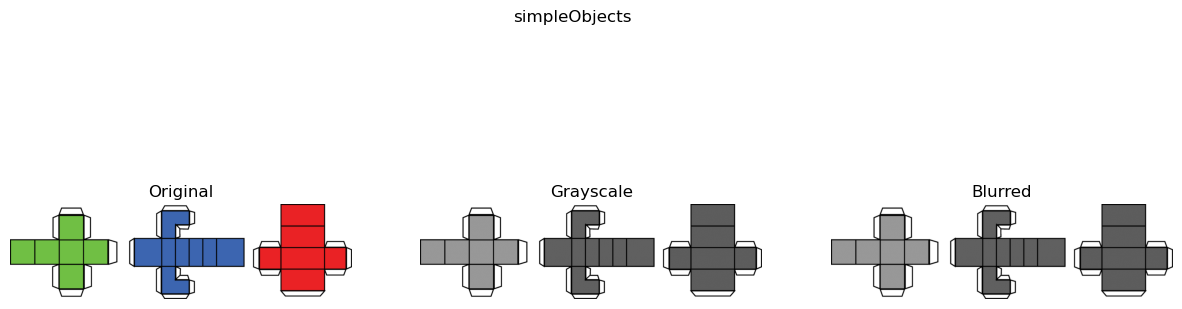

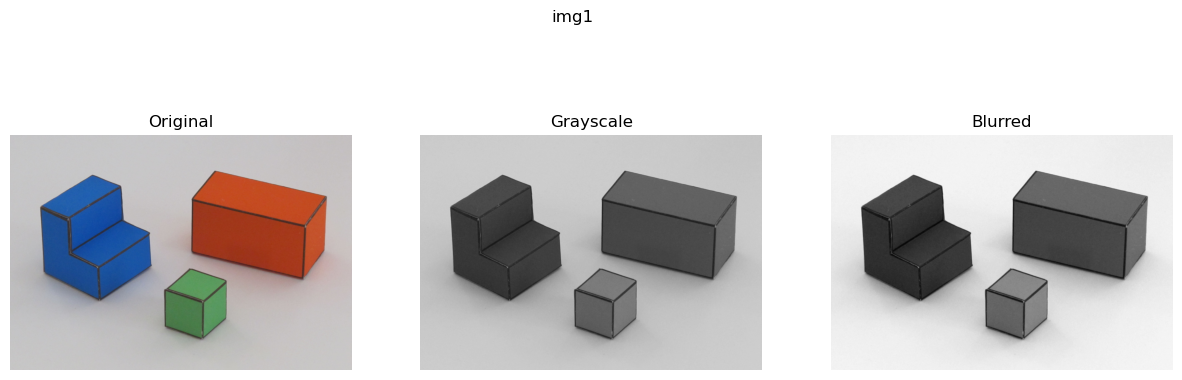

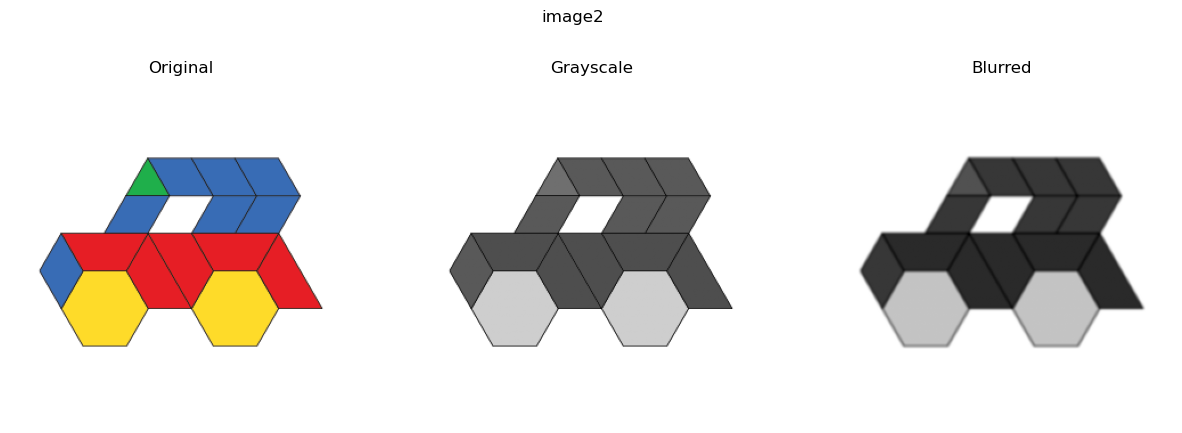

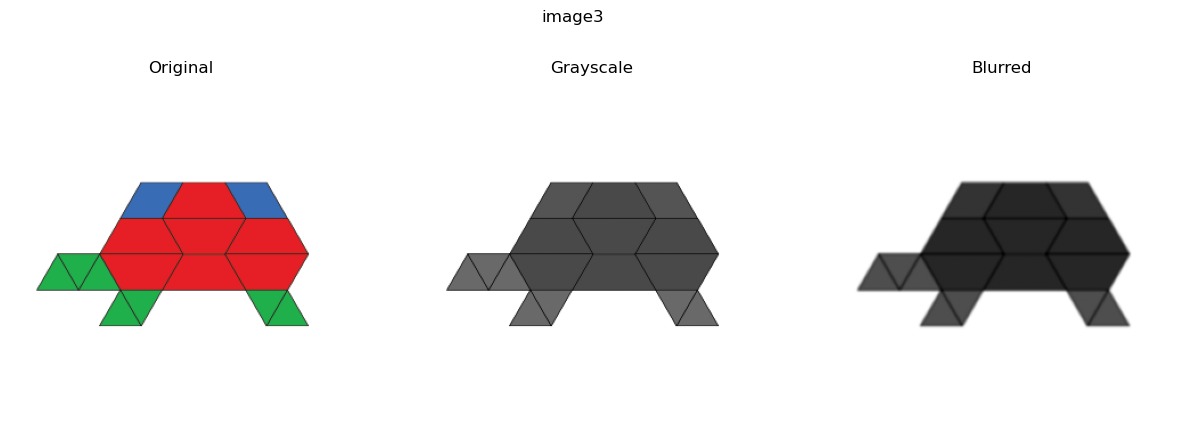

In [20]:
for image_filename in image_filenames:
    basename = os.path.splitext(os.path.basename(image_filename))[0]
    img = cv2.imread(image_filename)
    if img is None:
        print(f"Could not read {image_filename}")
        continue
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)

    cv2.imwrite(f'results/{basename}_original.png', img)
    cv2.imwrite(f'results/{basename}_gray.png', gray)
    cv2.imwrite(f'results/{basename}_blurred.png', blurred)

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1); plt.title("Original"); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,3,2); plt.title("Grayscale"); plt.imshow(gray, cmap='gray'); plt.axis('off')
    plt.subplot(1,3,3); plt.title("Blurred"); plt.imshow(blurred, cmap='gray'); plt.axis('off')
    plt.suptitle(basename)
    plt.show()


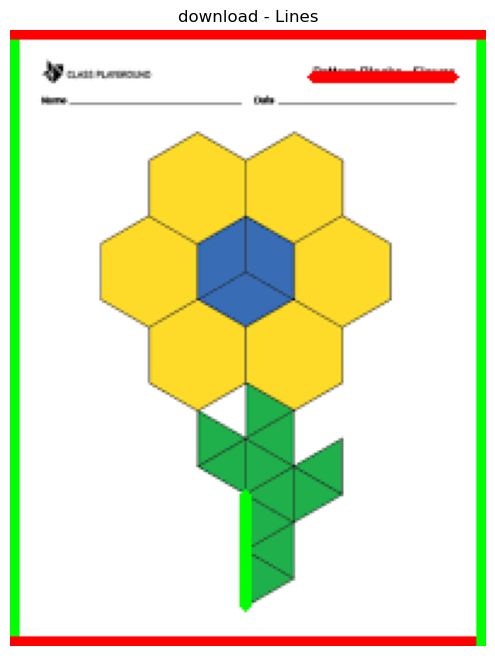

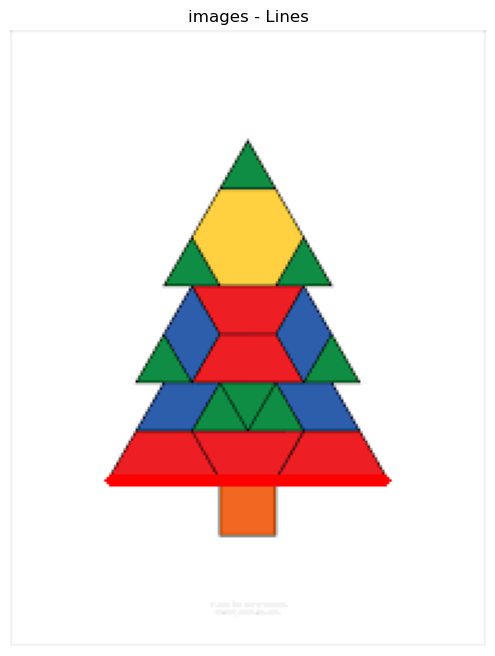

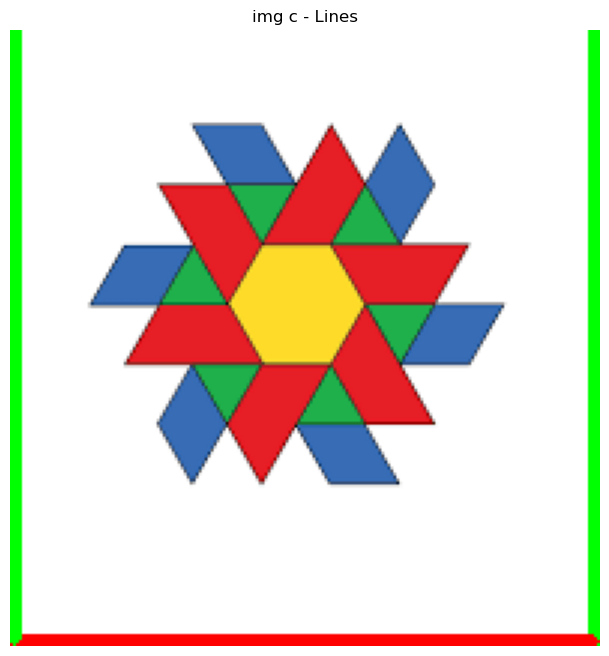

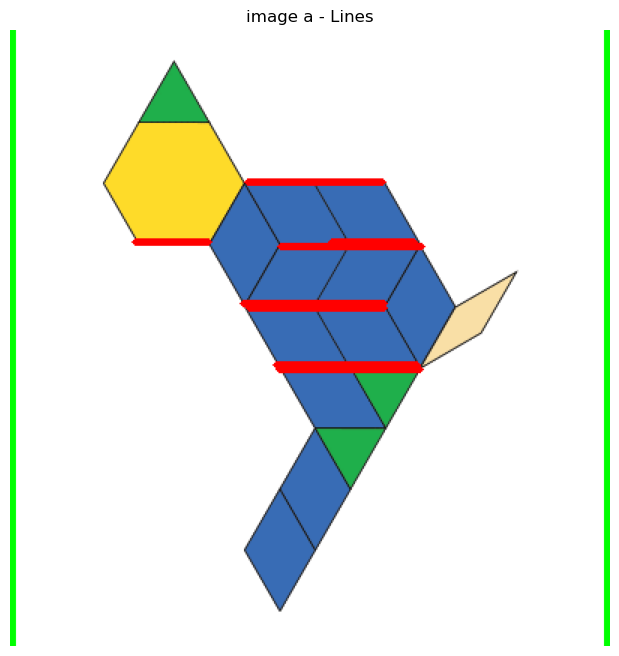

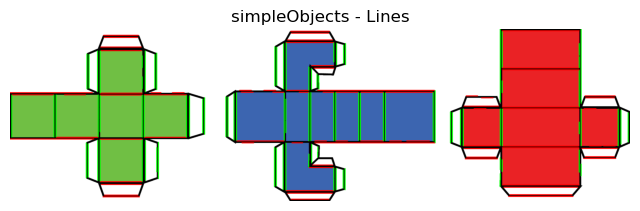

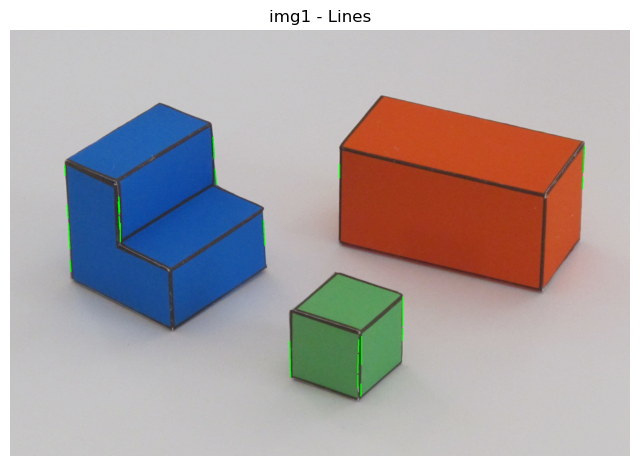

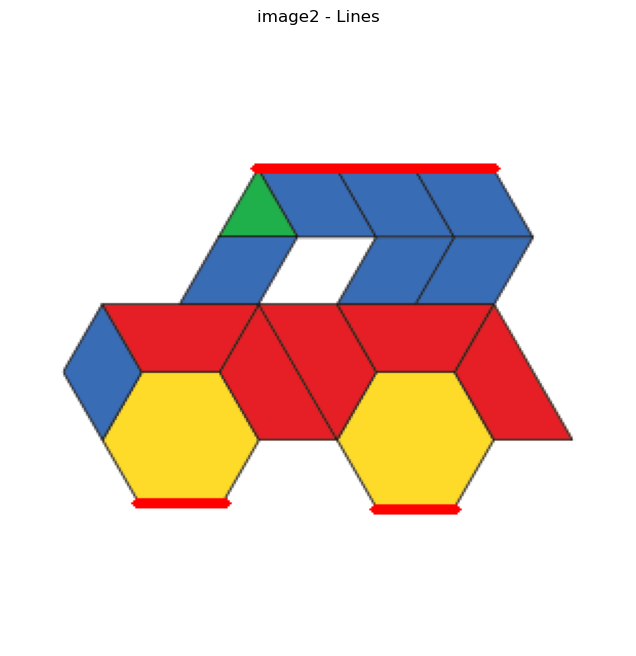

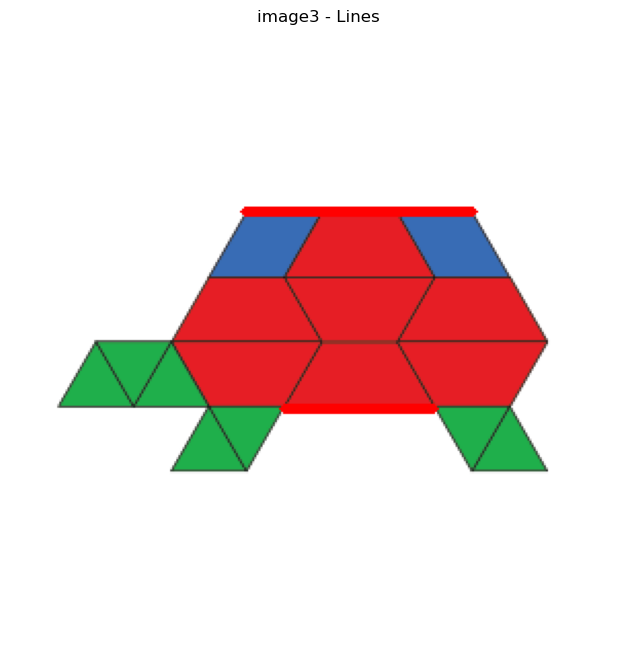

In [27]:
# Line Detection & Visualization
for image_filename in image_filenames:
    basename = os.path.splitext(os.path.basename(image_filename))[0]
    img = cv2.imread(image_filename)
    if img is None:
        continue
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    
    # Line detection
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=40, maxLineGap=5)
    img_lines = img.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.degrees(np.arctan2(y2-y1, x2-x1))
            # Vertical lines
            if 80 <= abs(angle) <= 100:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0,255,0), 3)
            # Horizontal lines
            elif abs(angle) <= 10 or abs(angle) >= 170:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0,0,255), 3)

    # Save and display result
    cv2.imwrite(f'results/{basename}_lines.png', img_lines)
    plt.figure(figsize=(8,8))
    plt.title(f"{basename} - Lines")
    plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


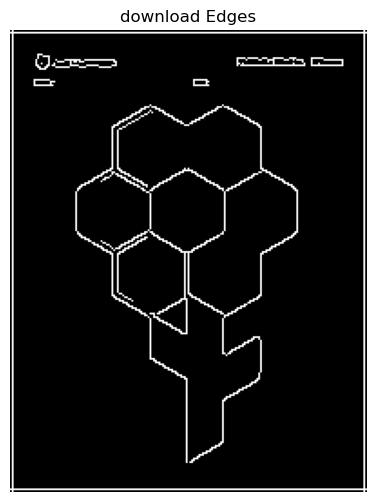

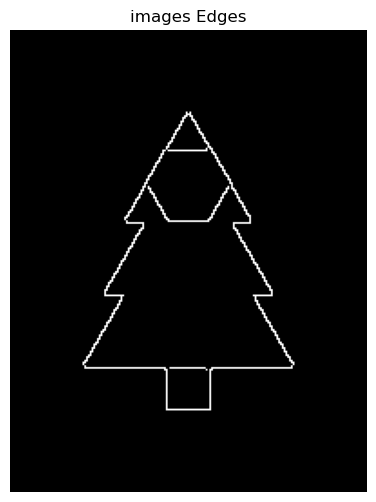

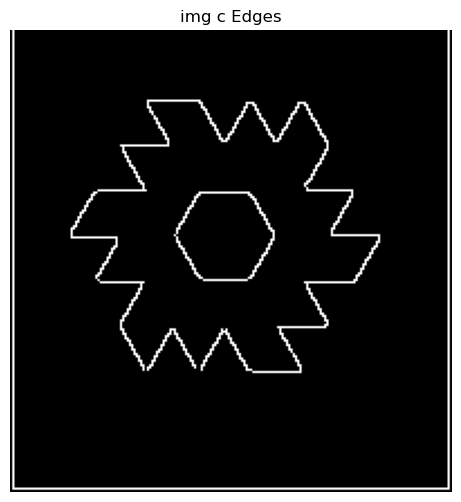

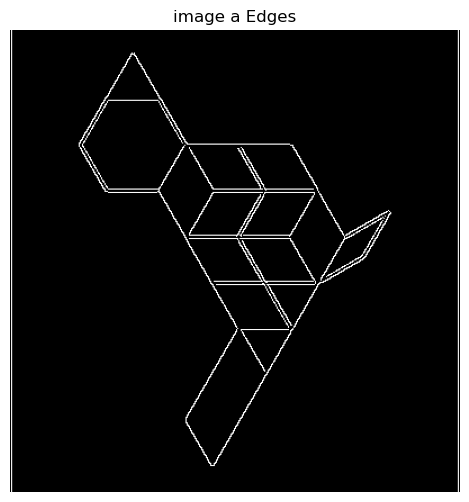

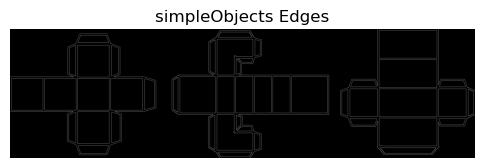

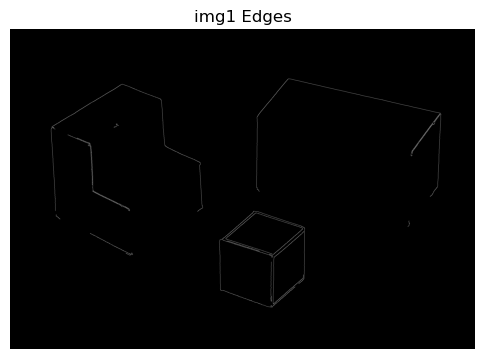

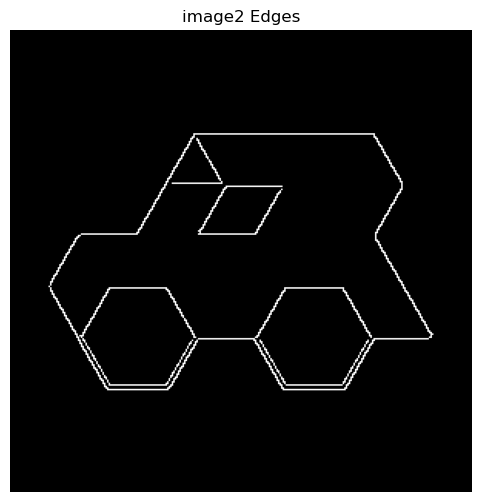

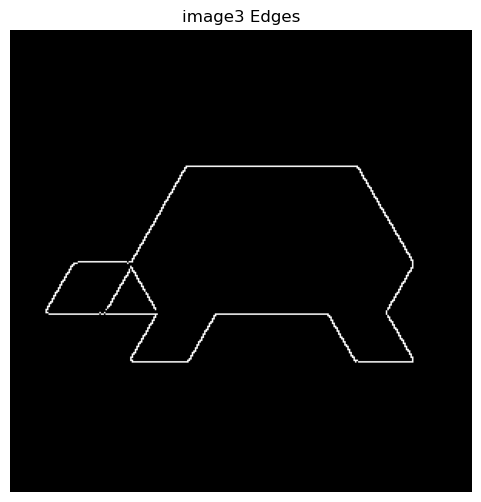

In [29]:
#Edge Detection
for image_filename in image_filenames:
    basename = os.path.splitext(os.path.basename(image_filename))[0]
    img = cv2.imread(image_filename)
    if img is None:
        continue
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)

    edges = cv2.Canny(blurred, 50, 150)
    cv2.imwrite(f'results/{basename}_edges.png', edges)

    plt.figure(figsize=(6,6))
    plt.title(f"{basename} Edges")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.show()


In [40]:
# blocks_world_processing.py
# Author: Manasa Maram
# Date: Nov 2025
# Description:
# Processes multiple block world images: grayscale, blur, edge detection, line classification.
# Saves results for each image in the 'results' folder. Extensively commented for clarity.

import cv2            # OpenCV for image processing
import numpy as np    # NumPy for numerical operations
import matplotlib.pyplot as plt  # For visualizing results
import os             # For file/directory management


In [41]:
# Ensure the results folder exists.
os.makedirs('results', exist_ok=True)

# List of block world image file paths.
image_filenames = [
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\download.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\images.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\img c.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\image a.gif",
    "C:\\Users\\manasa\\Desktop\\simpleObjects.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\img1.jpg",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\image2.gif",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\image3.gif"
]



In [46]:
# Loop through each image for full processing:
for image_filename in image_filenames:
    basename = os.path.splitext(os.path.basename(image_filename))[0]  # Get image name for output files
    
    # Load image from file
    img = cv2.imread(image_filename)
    if img is None:
        print(f"Could not read {image_filename}")
        continue  # Skip to next image if not found

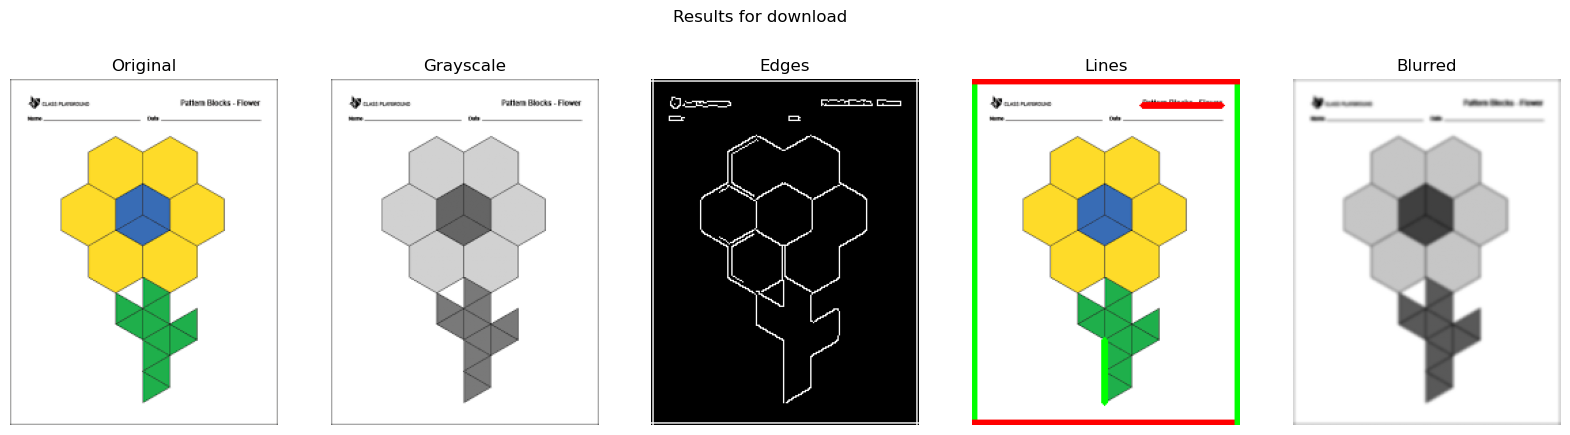

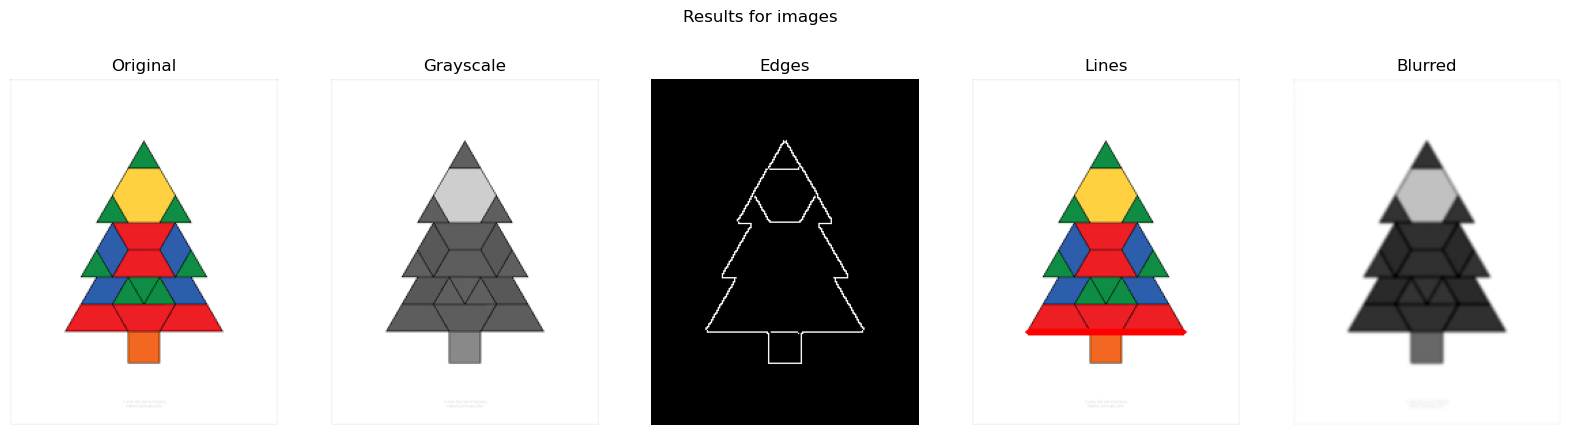

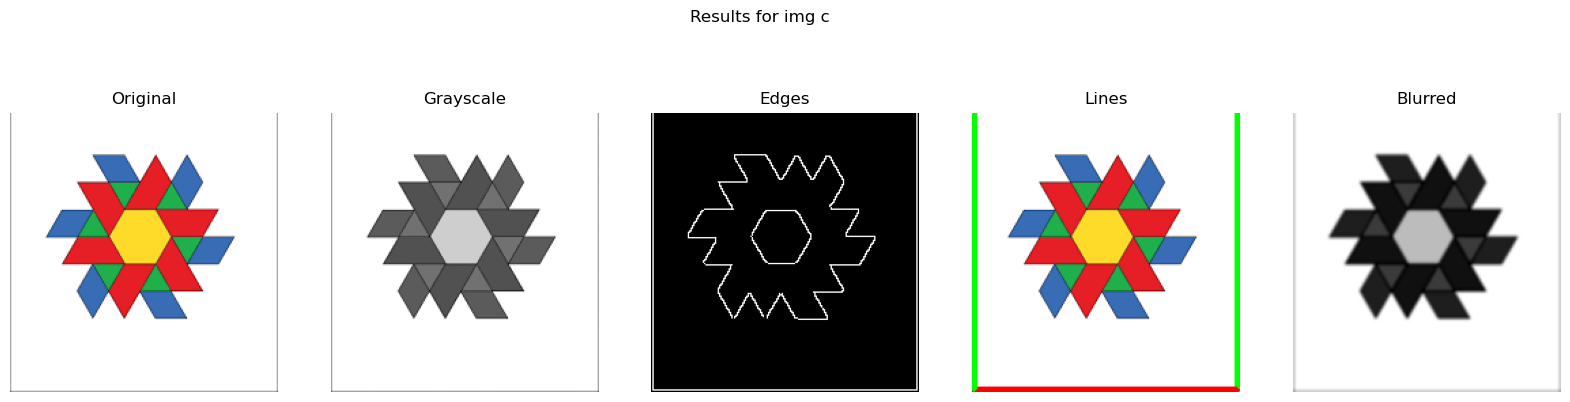

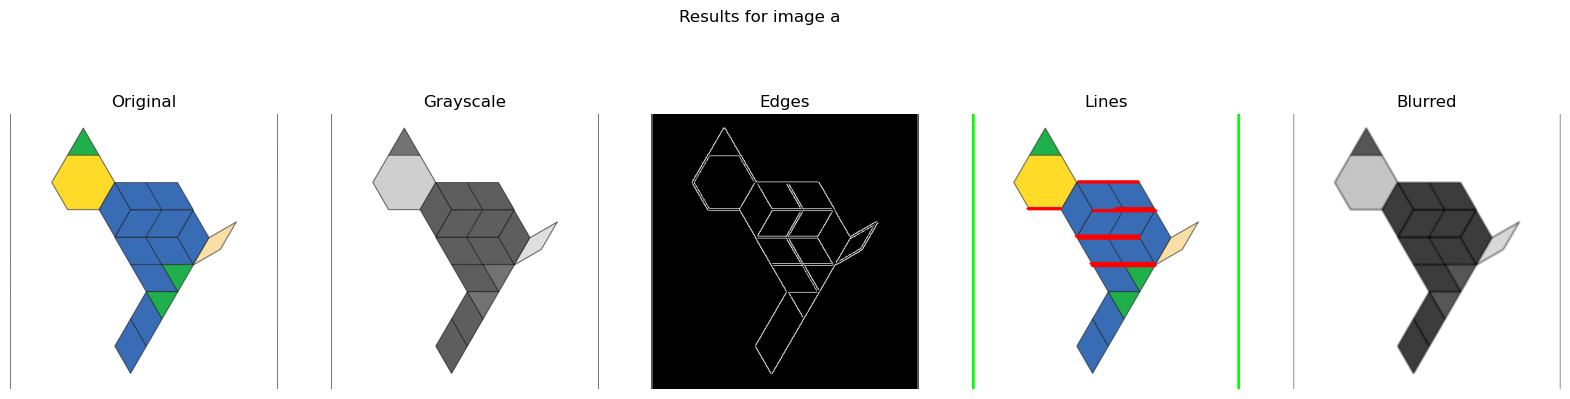

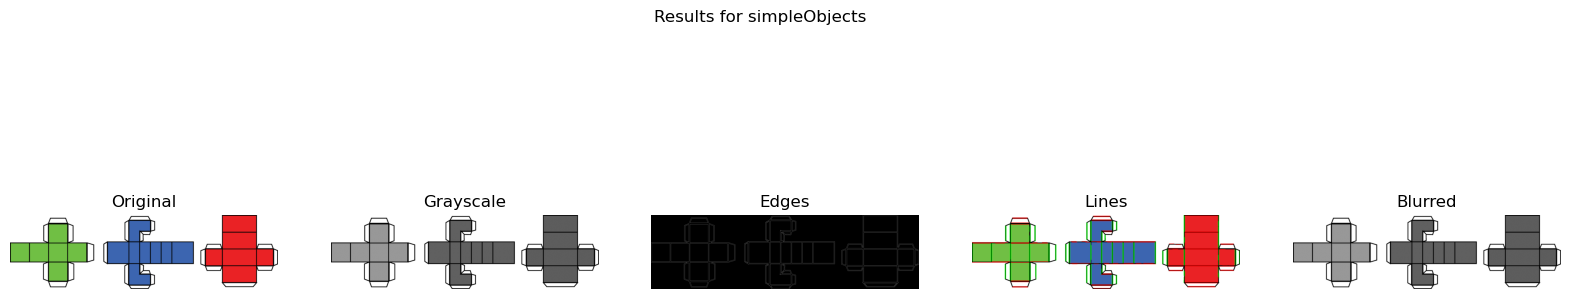

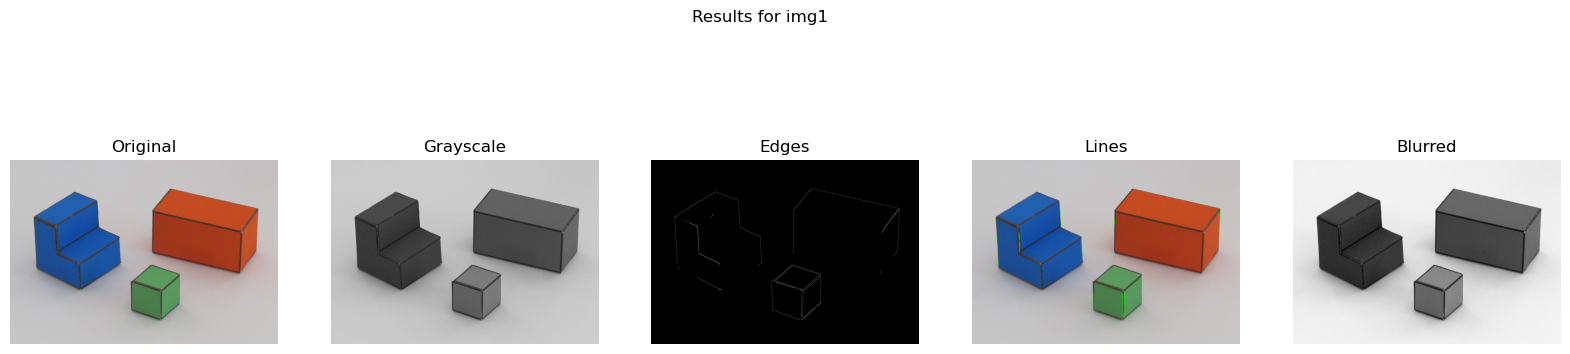

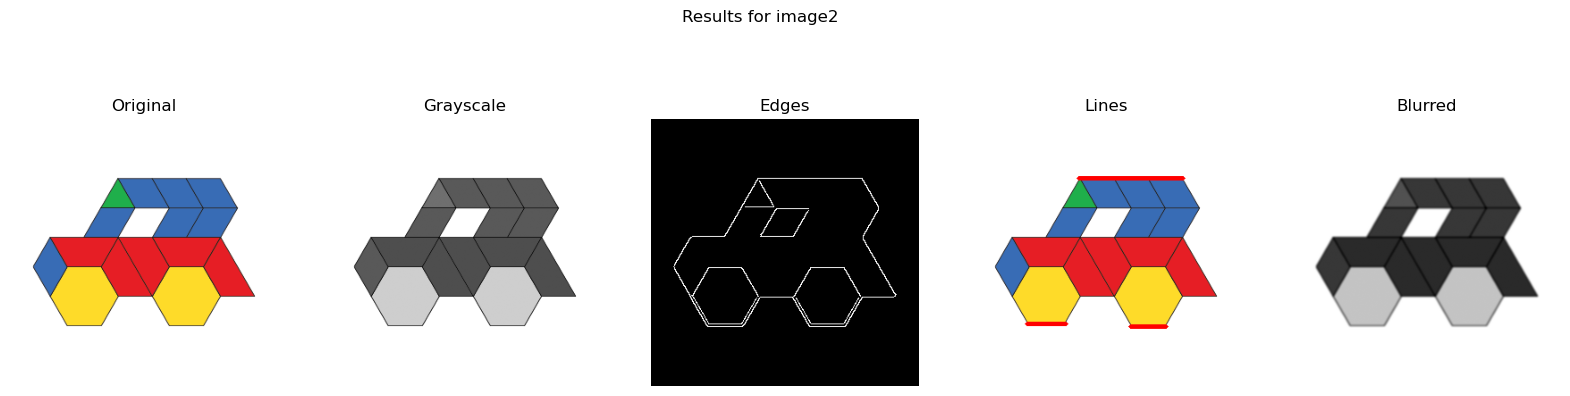

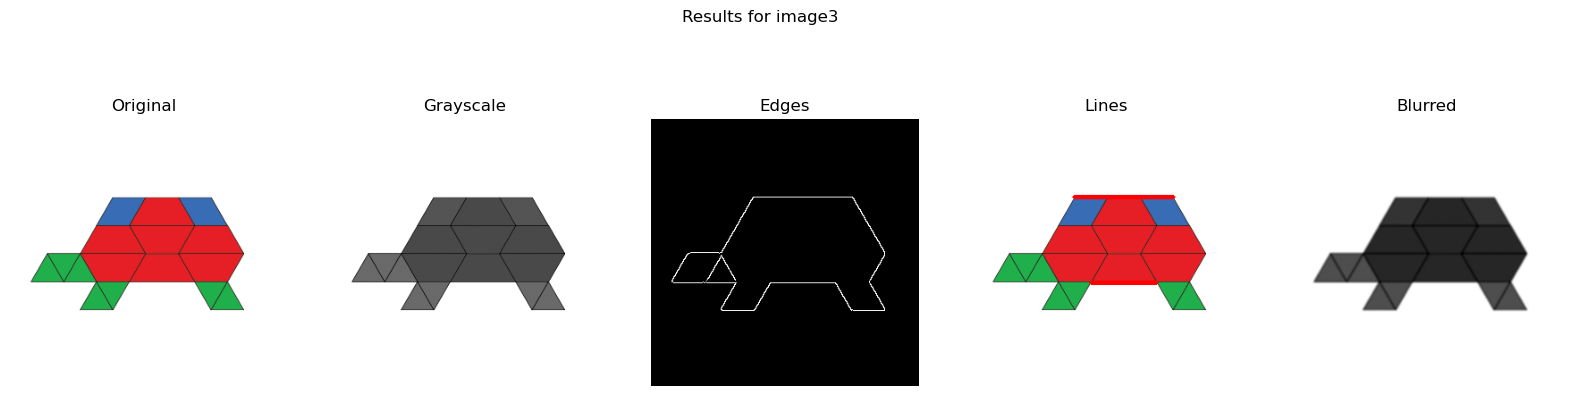

In [47]:
# Loop through each image for full processing:
for image_filename in image_filenames:
    basename = os.path.splitext(os.path.basename(image_filename))[0]  # Get image name for output files
    
    # Load image from file
    img = cv2.imread(image_filename)
    if img is None:
        print(f"Could not read {image_filename}")
        continue  # Skip to next image if not found
    
    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Apply Gaussian blur to smooth image
    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    
    # Step 3: Edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)
    
    # Step 4: Line detection using Hough transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, 
                            minLineLength=40, maxLineGap=5)
    img_lines = img.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.degrees(np.arctan2(y2-y1, x2-x1))
            # Draw vertical lines in green
            if 80 <= abs(angle) <= 100:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0,255,0), 3)
            # Draw horizontal lines in red
            elif abs(angle) <= 10 or abs(angle) >= 170:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0,0,255), 3)
    
    # Step 5: Save all result images for the current image
    cv2.imwrite(f'results/{basename}_original.png', img)
    cv2.imwrite(f'results/{basename}_gray.png', gray)
    cv2.imwrite(f'results/{basename}_blurred.png', blurred)
    cv2.imwrite(f'results/{basename}_edges.png', edges)
    cv2.imwrite(f'results/{basename}_lines.png', img_lines)
    
    # Step 6: Visualize results as a set of panels
    plt.figure(figsize=(20,5))
    plt.subplot(1,5,1); plt.title("Original"); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,5,2); plt.title("Grayscale"); plt.imshow(gray, cmap='gray'); plt.axis('off')
    plt.subplot(1,5,3); plt.title("Edges"); plt.imshow(edges, cmap='gray'); plt.axis('off')
    plt.subplot(1,5,4); plt.title("Lines"); plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,5,5); plt.title("Blurred"); plt.imshow(blurred, cmap='gray'); plt.axis('off')
    plt.suptitle(f"Results for {basename}")
    plt.show()

# End of script. Each image result is saved and visualized. See README for how to run.


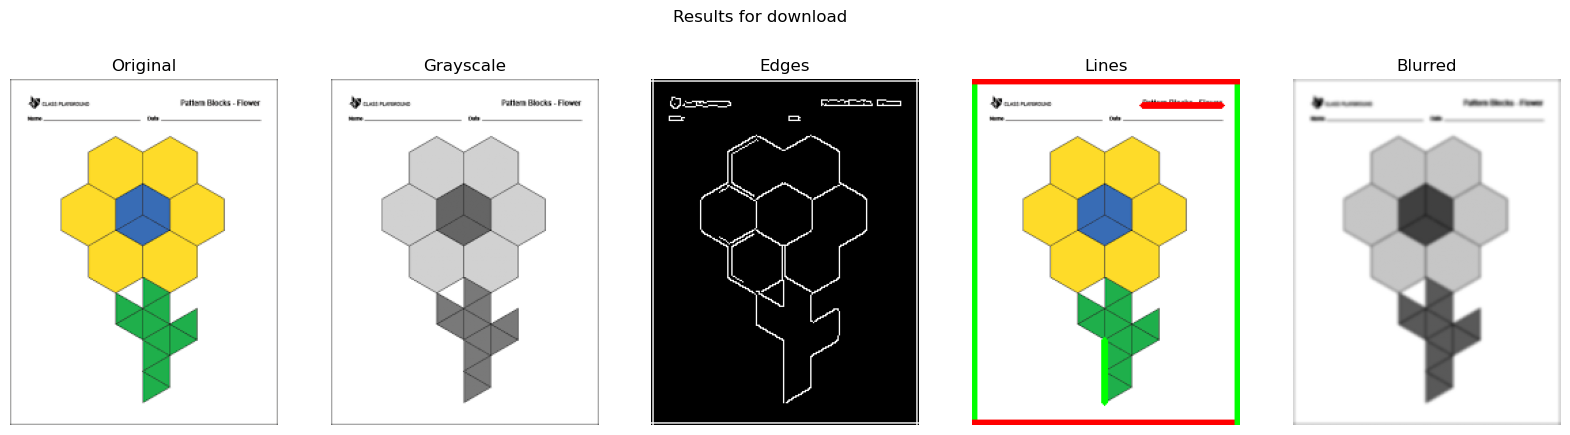

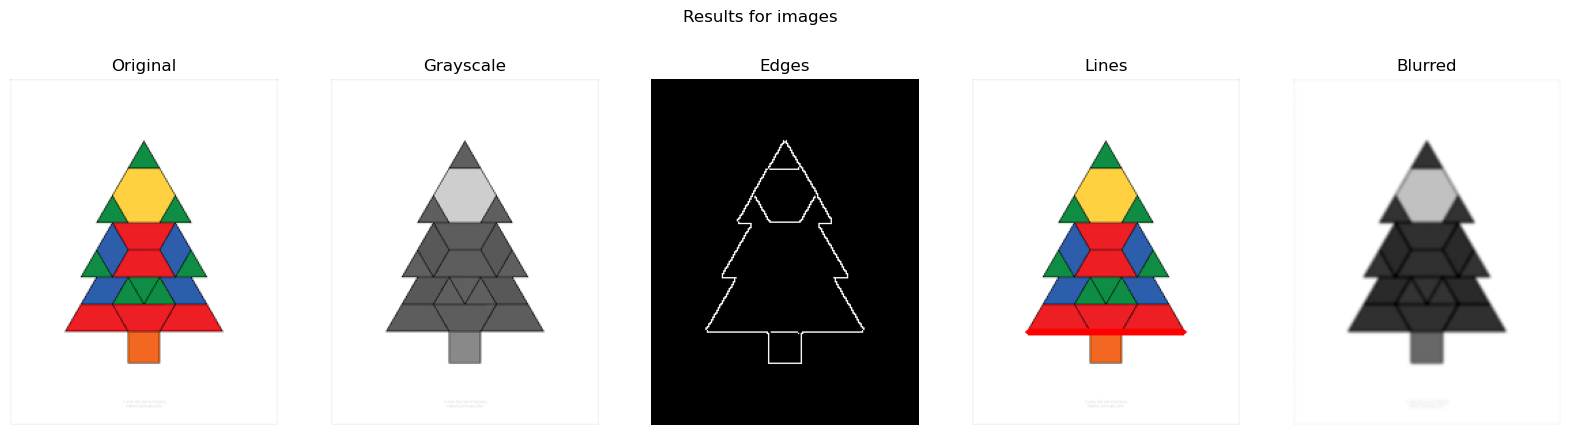

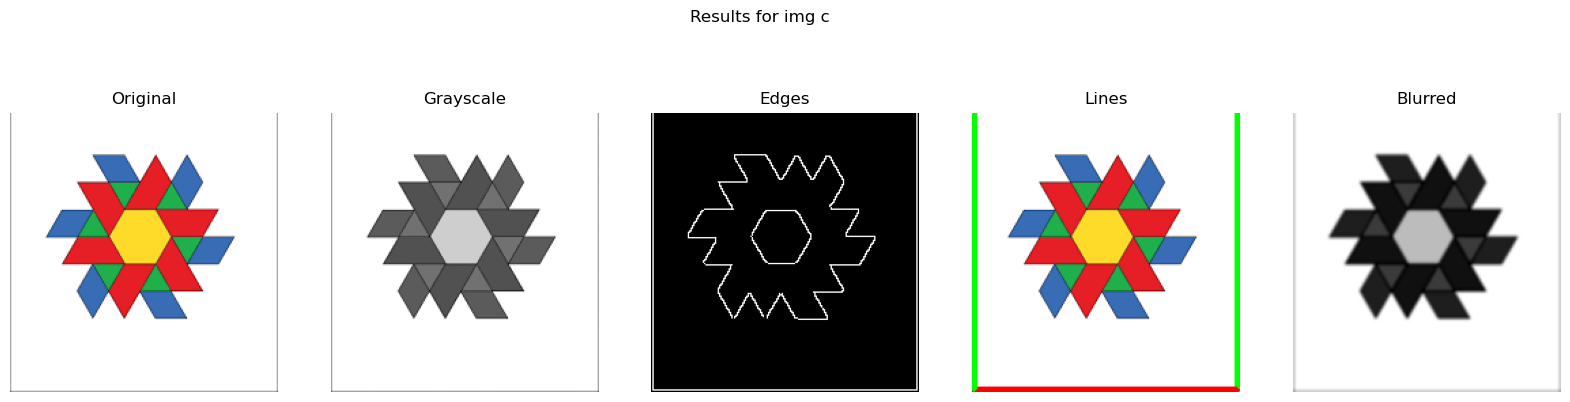

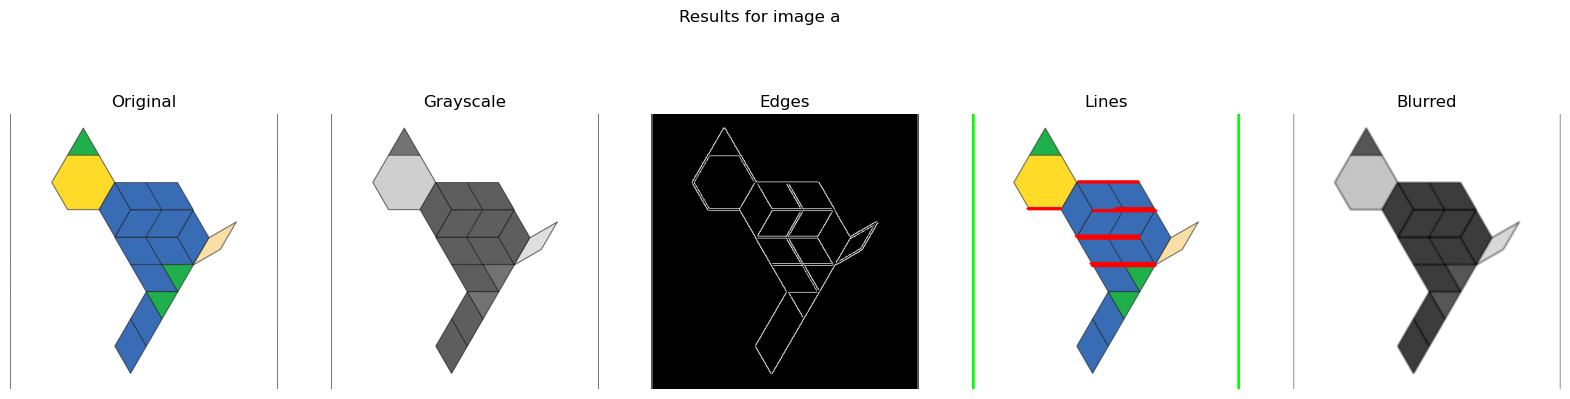

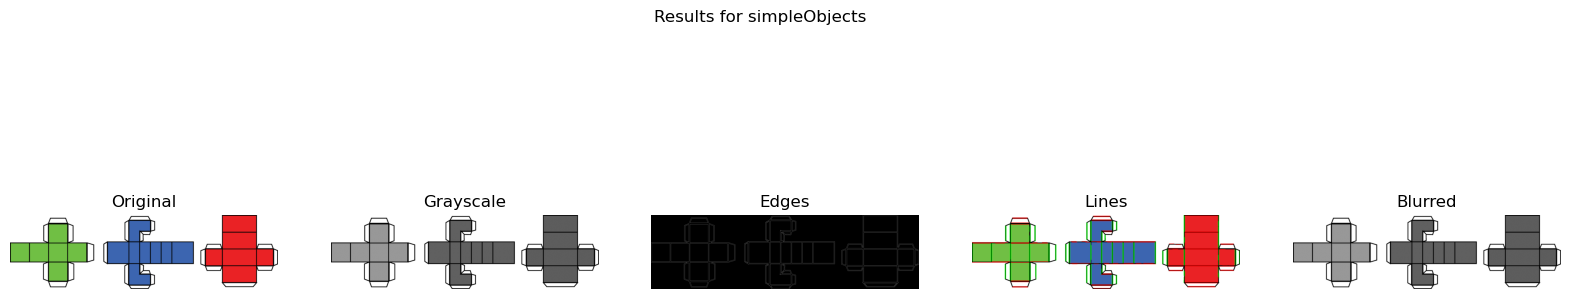

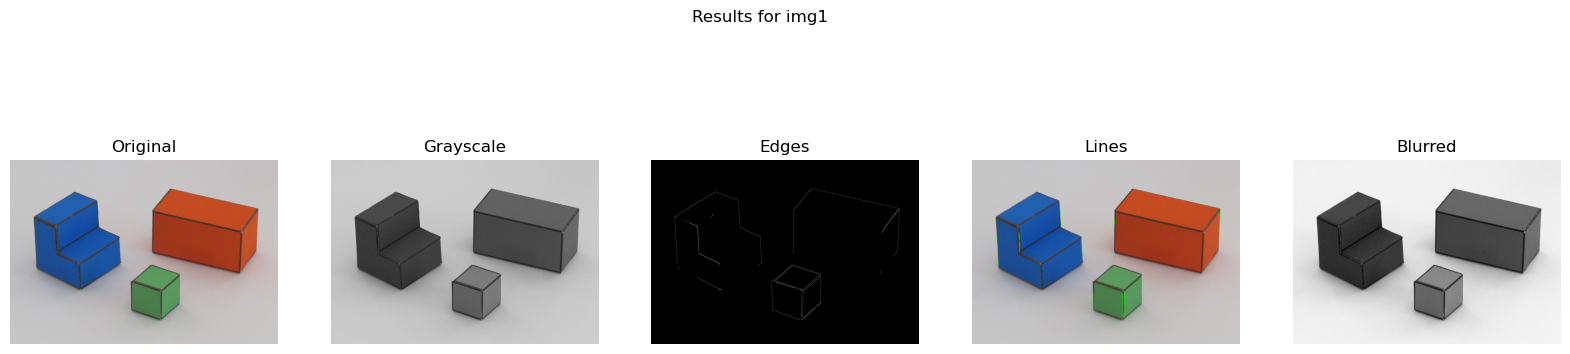

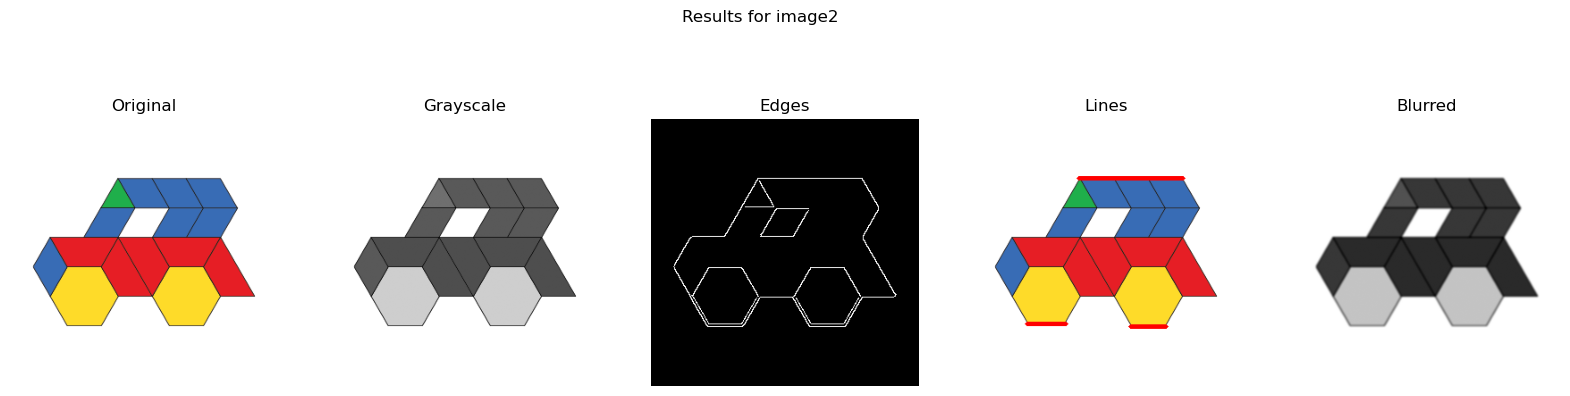

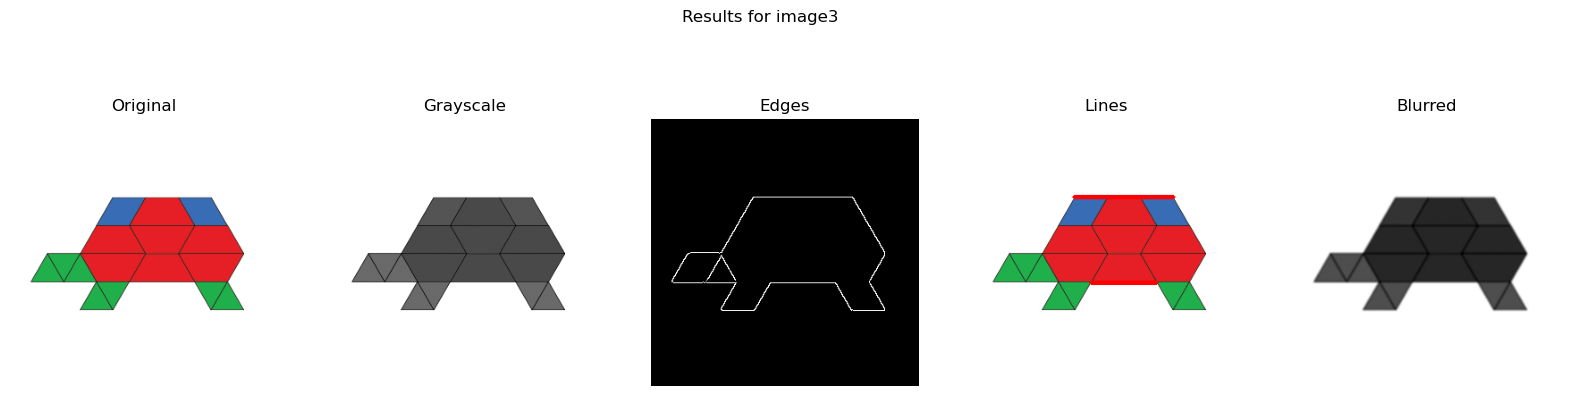

In [48]:
# Loop through each image for full processing:
for image_filename in image_filenames:
    basename = os.path.splitext(os.path.basename(image_filename))[0]  # Get image name for output files
    
    # Load image from file
    img = cv2.imread(image_filename)
    if img is None:
        print(f"Could not read {image_filename}")
        continue  # Skip to next image if not found
    
    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Apply Gaussian blur to smooth image
    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    
    # Step 3: Edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)
    
    # Step 4: Line detection using Hough transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, 
                            minLineLength=40, maxLineGap=5)
    img_lines = img.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.degrees(np.arctan2(y2-y1, x2-x1))
            # Draw vertical lines in green
            if 80 <= abs(angle) <= 100:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0,255,0), 3)
            # Draw horizontal lines in red
            elif abs(angle) <= 10 or abs(angle) >= 170:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0,0,255), 3)
    
    # Step 5: Save all result images for the current image
    cv2.imwrite(f'results/{basename}_original.png', img)
    cv2.imwrite(f'results/{basename}_gray.png', gray)
    cv2.imwrite(f'results/{basename}_blurred.png', blurred)
    cv2.imwrite(f'results/{basename}_edges.png', edges)
    cv2.imwrite(f'results/{basename}_lines.png', img_lines)
    
    # Step 6: Visualize results as a set of panels
    plt.figure(figsize=(20,5))
    plt.subplot(1,5,1); plt.title("Original"); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,5,2); plt.title("Grayscale"); plt.imshow(gray, cmap='gray'); plt.axis('off')
    plt.subplot(1,5,3); plt.title("Edges"); plt.imshow(edges, cmap='gray'); plt.axis('off')
    plt.subplot(1,5,4); plt.title("Lines"); plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,5,5); plt.title("Blurred"); plt.imshow(blurred, cmap='gray'); plt.axis('off')
    plt.suptitle(f"Results for {basename}")
    plt.show()

# End of script. Each image result is saved and visualized. See README for how to run.
